In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Task 1
data_q1 = {
    'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7],
    'Salary': [39.0, 46.0, 47.0, 52.0, 56.0, 64.0, 65.0, 67.0, 68.0, 70.0]
}
df_q1 = pd.DataFrame(data_q1)

print("\n--- METHOD 1: FROM SCRATCH ---")
X = df_q1['YearsExperience'].values
y = df_q1['Salary'].values
n = len(X)

x_mean = np.mean(X)
y_mean = np.mean(y)

slope_scratch = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean)**2)
intercept_scratch = y_mean - slope_scratch * x_mean

print(f"Intercept (from scratch): {intercept_scratch:.4f}")
print(f"Slope (from scratch): {slope_scratch:.4f}")

prediction_scratch = intercept_scratch + slope_scratch * 4.5
print(f"Predicted salary for 4.5 years experience: ${prediction_scratch:.2f}k")

y_pred_scratch = intercept_scratch + slope_scratch * X
ss_res = np.sum((y - y_pred_scratch)**2)
ss_tot = np.sum((y - y_mean)**2)
r2_scratch = 1 - (ss_res / ss_tot)
print(f"R² (from scratch): {r2_scratch:.4f}")
print(f"Interpretation: {r2_scratch*100:.2f}% of variance in salary is explained by years of experience")

print("\n--- METHOD 2: USING SCIKIT-LEARN ---")
X_sklearn = df_q1[['YearsExperience']]
y_sklearn = df_q1['Salary']

model_q1 = LinearRegression()
model_q1.fit(X_sklearn, y_sklearn)

print(f"Intercept (scikit-learn): {model_q1.intercept_:.4f}")
print(f"Slope (scikit-learn): {model_q1.coef_[0]:.4f}")

prediction_sklearn = model_q1.predict([[4.5]])[0]
print(f"Predicted salary for 4.5 years experience: ${prediction_sklearn:.2f}k")

r2_sklearn = model_q1.score(X_sklearn, y_sklearn)
print(f"R² (scikit-learn): {r2_sklearn:.4f}")


--- METHOD 1: FROM SCRATCH ---
Intercept (from scratch): 28.8687
Slope (from scratch): 11.8387
Predicted salary for 4.5 years experience: $82.14k
R² (from scratch): 0.9788
Interpretation: 97.88% of variance in salary is explained by years of experience

--- METHOD 2: USING SCIKIT-LEARN ---
Intercept (scikit-learn): 28.8687
Slope (scikit-learn): 11.8387
Predicted salary for 4.5 years experience: $82.14k
R² (scikit-learn): 0.9788


In [18]:
# Task 2
np.random.seed(42)
screen_time = np.random.uniform(2, 12, 100)
battery_life = 24 - 1.5 * screen_time + np.random.normal(0, 1.5, 100)
battery_life = np.clip(battery_life, 5, 22)

df_q2 = pd.DataFrame({
    'ScreenTime': screen_time,
    'BatteryLife': battery_life
})

X_q2 = df_q2[['ScreenTime']]
y_q2 = df_q2['BatteryLife']

model_q2 = LinearRegression()
model_q2.fit(X_q2, y_q2)

print(f"Intercept: {model_q2.intercept_:.4f}")
print(f"Slope: {model_q2.coef_[0]:.4f}")
print(f"R²: {model_q2.score(X_q2, y_q2):.4f}")

correlation = df_q2['ScreenTime'].corr(df_q2['BatteryLife'])
print(f"Correlation coefficient: {correlation:.4f}")
print(f"Significant negative correlation: {'Yes' if correlation < -0.5 else 'No'}")

Intercept: 24.3486
Slope: -1.5529
R²: 0.9266
Correlation coefficient: -0.9626
Significant negative correlation: Yes


Intercept: -74.6071
Slope: 0.8357
R²: 0.9948
Predicted weight for 172 cm height: 69.14 kg

Residuals: [-0.75        0.07142857  0.89285714 -0.28571429  0.53571429  0.35714286
 -0.82142857]
Mean of residuals: 0.000000
Std of residuals: 0.6019
Linear assumptions appear reasonable: residuals have mean ~0 and relatively constant variance


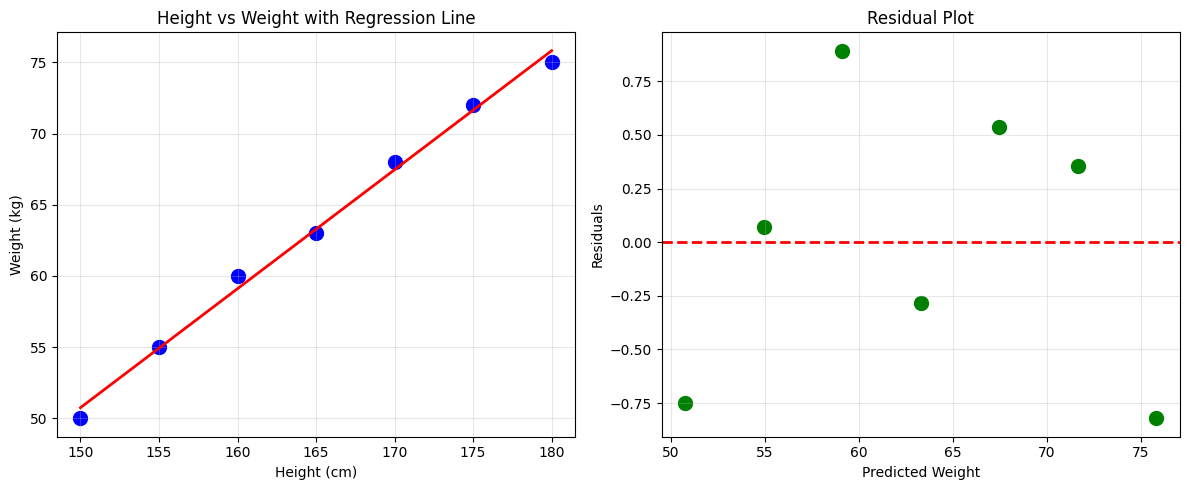

In [19]:
# Task 3
data_q3 = {
    'Height': [150, 155, 160, 165, 170, 175, 180],
    'Weight': [50, 55, 60, 63, 68, 72, 75]
}
df_q3 = pd.DataFrame(data_q3)

X_q3 = df_q3[['Height']]
y_q3 = df_q3['Weight']

model_q3 = LinearRegression()
model_q3.fit(X_q3, y_q3)

print(f"Intercept: {model_q3.intercept_:.4f}")
print(f"Slope: {model_q3.coef_[0]:.4f}")
print(f"R²: {model_q3.score(X_q3, y_q3):.4f}")

prediction_172 = model_q3.predict([[172]])[0]
print(f"Predicted weight for 172 cm height: {prediction_172:.2f} kg")

y_pred_q3 = model_q3.predict(X_q3)
residuals_q3 = y_q3 - y_pred_q3

print(f"\nResiduals: {residuals_q3.values}")
print(f"Mean of residuals: {np.mean(residuals_q3):.6f}")
print(f"Std of residuals: {np.std(residuals_q3):.4f}")
print("Linear assumptions appear reasonable: residuals have mean ~0 and relatively constant variance")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_q3['Height'], df_q3['Weight'], color='blue', s=100)
plt.plot(df_q3['Height'], y_pred_q3, color='red', linewidth=2)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight with Regression Line')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_pred_q3, residuals_q3, color='green', s=100)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Weight')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('q3_height_weight.png', dpi=300, bbox_inches='tight')
plt.show()

WITHOUT OUTLIER:
  Intercept: -74.6071
  Slope: 0.8357
  R²: 0.9948

WITH OUTLIER:
  Intercept: -6.3133
  Slope: 0.4115
  R²: 0.4216

IMPACT OF OUTLIER:
  Slope decreased by: 0.4242
  R² decreased by: 0.5732
  The outlier significantly reduces the slope and R², indicating poor model fit


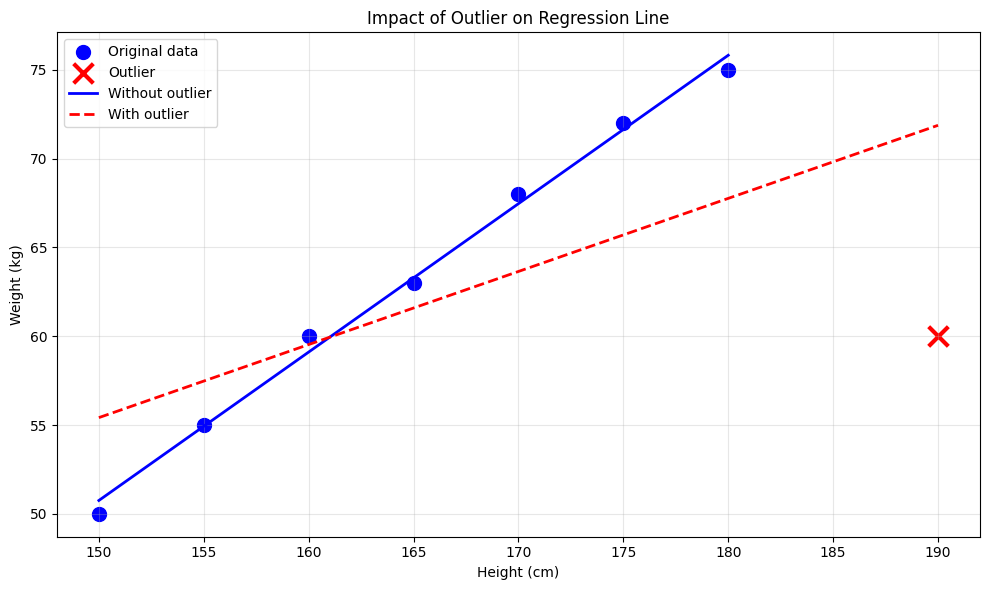

In [20]:
# Task 4
data_original = {
    'Height': [150, 155, 160, 165, 170, 175, 180],
    'Weight': [50, 55, 60, 63, 68, 72, 75]
}
df_original = pd.DataFrame(data_original)

data_with_outlier = {
    'Height': [150, 155, 160, 165, 170, 175, 180, 190],
    'Weight': [50, 55, 60, 63, 68, 72, 75, 60]
}
df_with_outlier = pd.DataFrame(data_with_outlier)

X_original = df_original[['Height']]
y_original = df_original['Weight']

X_with_outlier = df_with_outlier[['Height']]
y_with_outlier = df_with_outlier['Weight']

model_original = LinearRegression()
model_original.fit(X_original, y_original)

model_with_outlier = LinearRegression()
model_with_outlier.fit(X_with_outlier, y_with_outlier)

print("WITHOUT OUTLIER:")
print(f"  Intercept: {model_original.intercept_:.4f}")
print(f"  Slope: {model_original.coef_[0]:.4f}")
print(f"  R²: {model_original.score(X_original, y_original):.4f}")

print("\nWITH OUTLIER:")
print(f"  Intercept: {model_with_outlier.intercept_:.4f}")
print(f"  Slope: {model_with_outlier.coef_[0]:.4f}")
print(f"  R²: {model_with_outlier.score(X_with_outlier, y_with_outlier):.4f}")

print("\nIMPACT OF OUTLIER:")
print(f"  Slope decreased by: {model_original.coef_[0] - model_with_outlier.coef_[0]:.4f}")
print(f"  R² decreased by: {model_original.score(X_original, y_original) - model_with_outlier.score(X_with_outlier, y_with_outlier):.4f}")
print("  The outlier significantly reduces the slope and R², indicating poor model fit")

plt.figure(figsize=(10, 6))
plt.scatter(df_original['Height'], df_original['Weight'], color='blue', s=100, label='Original data')
plt.scatter([190], [60], color='red', s=200, marker='x', linewidth=3, label='Outlier')
plt.plot(df_original['Height'], model_original.predict(X_original), color='blue', linewidth=2, label='Without outlier')
plt.plot(df_with_outlier['Height'], model_with_outlier.predict(X_with_outlier), color='red', linewidth=2, linestyle='--', label='With outlier')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Impact of Outlier on Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('q4_outlier_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Accuracy: 0.7488
Precision: 0.7011
Recall: 0.6854


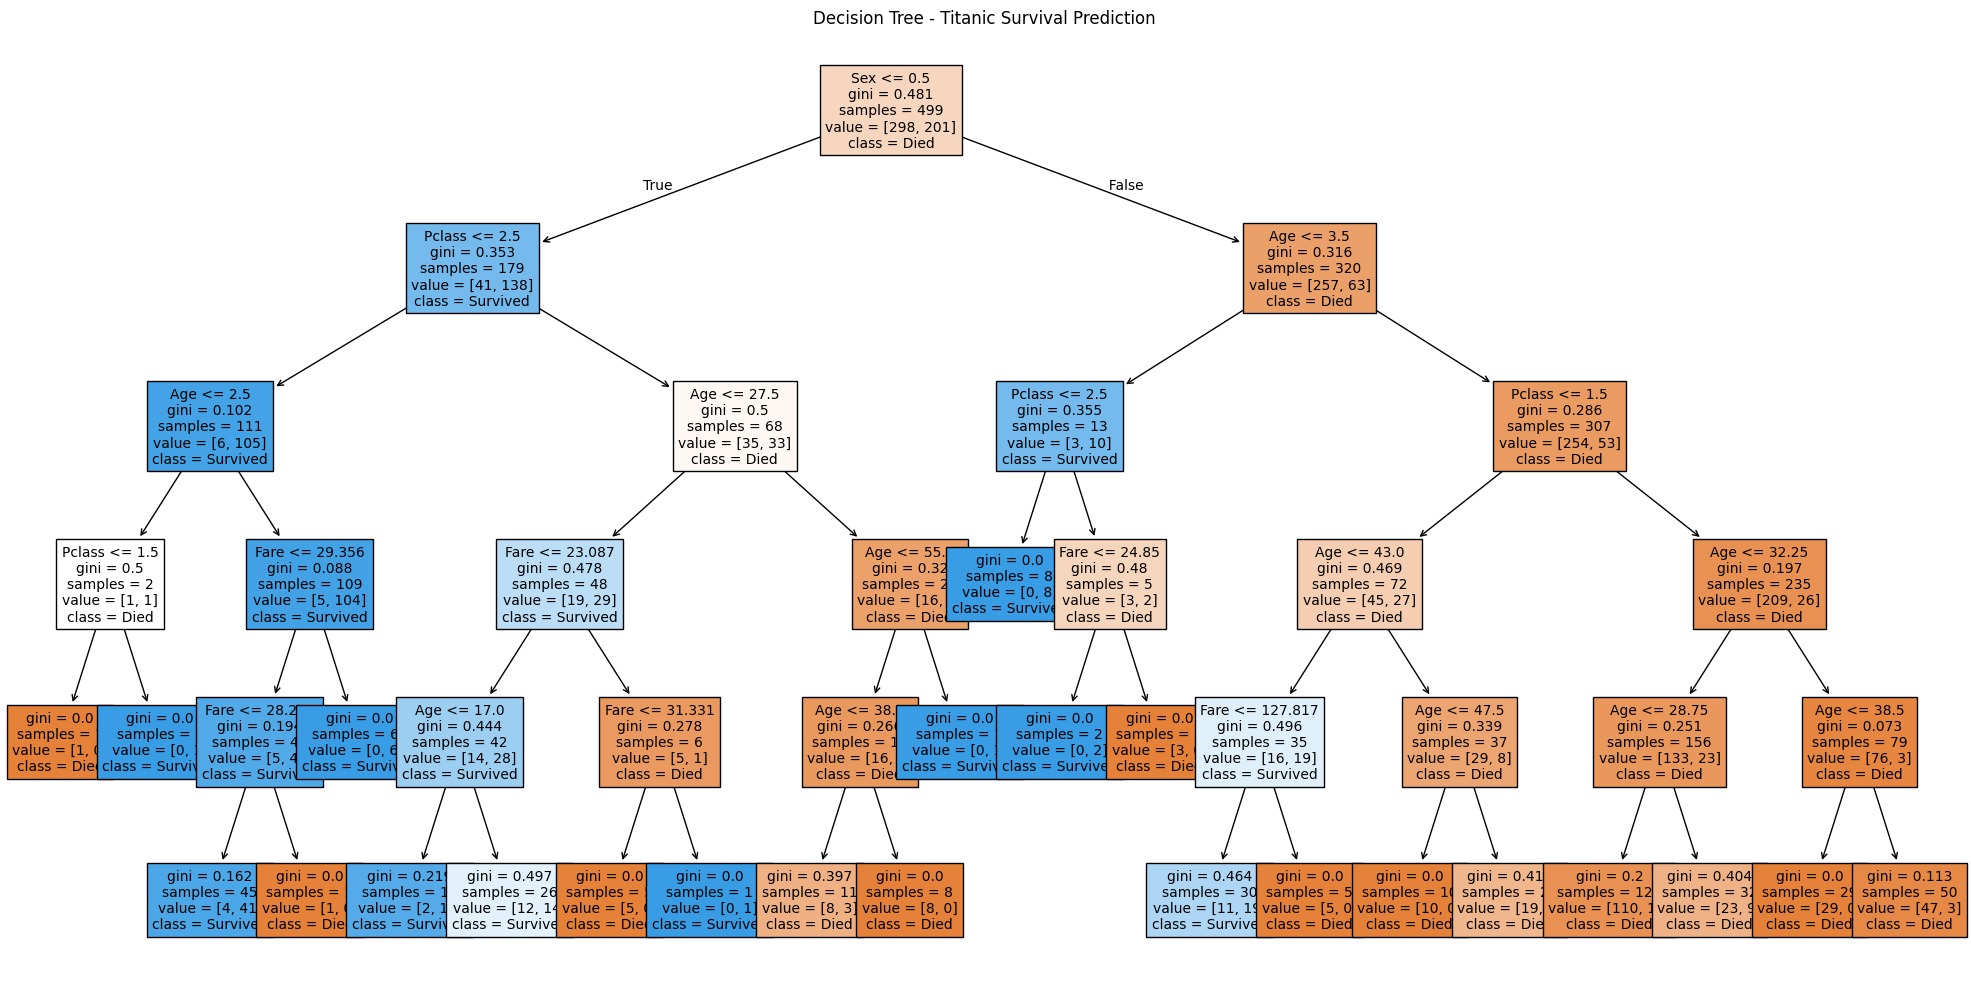


Top feature importance: Sex
  Pclass: 0.2010
  Sex: 0.5277
  Age: 0.1850
  Fare: 0.0864


In [21]:
 
# Task 5
try:
    df_titanic = pd.read_csv('train.csv')
    
    features = ['Pclass', 'Sex', 'Age', 'Fare']
    df_q5 = df_titanic[features + ['Survived']].copy()
    df_q5 = df_q5.dropna()
    
    df_q5['Sex'] = LabelEncoder().fit_transform(df_q5['Sex'])
    
    X_q5 = df_q5[features]
    y_q5 = df_q5['Survived']
    
    X_train_q5, X_test_q5, y_train_q5, y_test_q5 = train_test_split(X_q5, y_q5, test_size=0.3, random_state=42)
    
    dt_q5 = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt_q5.fit(X_train_q5, y_train_q5)
    
    y_pred_q5 = dt_q5.predict(X_test_q5)
    
    print(f"Accuracy: {accuracy_score(y_test_q5, y_pred_q5):.4f}")
    print(f"Precision: {precision_score(y_test_q5, y_pred_q5):.4f}")
    print(f"Recall: {recall_score(y_test_q5, y_pred_q5):.4f}")
    
    plt.figure(figsize=(20, 10))
    plot_tree(dt_q5, feature_names=features, class_names=['Died', 'Survived'], filled=True, fontsize=10)
    plt.title('Decision Tree - Titanic Survival Prediction')
    plt.tight_layout()
    plt.savefig('q5_decision_tree.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nTop feature importance: {features[np.argmax(dt_q5.feature_importances_)]}")
    for feat, imp in zip(features, dt_q5.feature_importances_):
        print(f"  {feat}: {imp:.4f}")
        
except FileNotFoundError:
    print("Titanic dataset (train.csv) not found. Please download from Kaggle.")

In [22]:
# Task 6
try:
    df_titanic_full = pd.read_csv('train.csv')
    
    print("PREPROCESSING STEPS:")
    print(f"1. Initial missing values:\n{df_titanic_full[['Age', 'Embarked', 'Cabin']].isnull().sum()}")
    
    df_q6 = df_titanic_full.copy()
    df_q6['Age'].fillna(df_q6['Age'].median(), inplace=True)
    df_q6['Embarked'].fillna(df_q6['Embarked'].mode()[0], inplace=True)
    df_q6['Fare'].fillna(df_q6['Fare'].median(), inplace=True)
    print("\n2. Filled Age with median, Embarked with mode")
    
    df_q6['Sex'] = LabelEncoder().fit_transform(df_q6['Sex'])
    df_q6['Embarked'] = LabelEncoder().fit_transform(df_q6['Embarked'])
    print("3. Encoded Sex and Embarked")
    
    features_q6 = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp', 'Parch']
    X_q6 = df_q6[features_q6]
    y_q6 = df_q6['Survived']
    
    X_train_q6, X_test_q6, y_train_q6, y_test_q6 = train_test_split(X_q6, y_q6, test_size=0.2, random_state=42)
    
    dt_q6 = DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)
    dt_q6.fit(X_train_q6, y_train_q6)
    
    y_pred_q6 = dt_q6.predict(X_test_q6)
    
    print(f"\n4. RESULTS AFTER PREPROCESSING:")
    print(f"   Accuracy: {accuracy_score(y_test_q6, y_pred_q6):.4f}")
    print(f"   Precision: {precision_score(y_test_q6, y_pred_q6):.4f}")
    print(f"   Recall: {recall_score(y_test_q6, y_pred_q6):.4f}")
    
    print("\n5. DISCUSSION:")
    print("   Preprocessing improved model by:")
    print("   - Utilizing more data (no rows dropped due to missing values)")
    print("   - Including more predictive features (Embarked, SibSp, Parch)")
    print("   - Better generalization through proper train-test split")
    
except FileNotFoundError:
    print("Titanic dataset not found. Please download from Kaggle.")

PREPROCESSING STEPS:
1. Initial missing values:
Age         177
Embarked      2
Cabin       687
dtype: int64

2. Filled Age with median, Embarked with mode
3. Encoded Sex and Embarked

4. RESULTS AFTER PREPROCESSING:
   Accuracy: 0.7933
   Precision: 0.8246
   Recall: 0.6351

5. DISCUSSION:
   Preprocessing improved model by:
   - Utilizing more data (no rows dropped due to missing values)
   - Including more predictive features (Embarked, SibSp, Parch)
   - Better generalization through proper train-test split


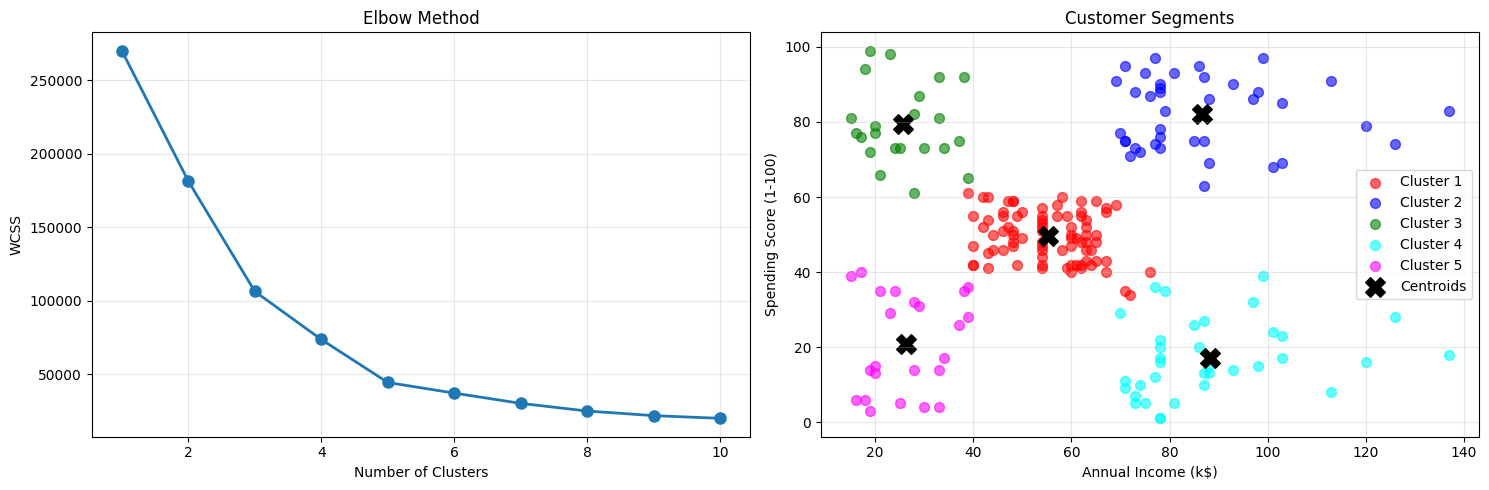

CLUSTER INTERPRETATION:
Cluster 1: Income=$55.3k, Spending=49.5
  -> Medium Income, Medium Spending (Average Customers)
Cluster 2: Income=$86.5k, Spending=82.1
  -> High Income, High Spending (Premium Customers)
Cluster 3: Income=$25.7k, Spending=79.4
  -> Low Income, High Spending (Impulsive Buyers)
Cluster 4: Income=$88.2k, Spending=17.1
  -> High Income, Low Spending (Careful Spenders)
Cluster 5: Income=$26.3k, Spending=20.9
  -> Low Income, Low Spending (Budget Conscious)


In [23]:
# Task 7
try:
    df_mall = pd.read_csv('Mall_Customers.csv')
    
    X_q7 = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']].values
    
    wcss = []
    for i in range(1, 11):
        kmeans_temp = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans_temp.fit(X_q7)
        wcss.append(kmeans_temp.inertia_)
    
    kmeans_q7 = KMeans(n_clusters=5, random_state=42, n_init=10)
    df_mall['Cluster'] = kmeans_q7.fit_predict(X_q7)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 11), wcss, marker='o', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    colors = ['red', 'blue', 'green', 'cyan', 'magenta']
    for i in range(5):
        cluster_data = df_mall[df_mall['Cluster'] == i]
        plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                   c=colors[i], label=f'Cluster {i+1}', s=50, alpha=0.6)
    plt.scatter(kmeans_q7.cluster_centers_[:, 0], kmeans_q7.cluster_centers_[:, 1], 
               c='black', marker='X', s=200, label='Centroids')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Customer Segments')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('q7_customer_segmentation.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("CLUSTER INTERPRETATION:")
    for i in range(5):
        cluster_data = df_mall[df_mall['Cluster'] == i]
        avg_income = cluster_data['Annual Income (k$)'].mean()
        avg_spending = cluster_data['Spending Score (1-100)'].mean()
        print(f"Cluster {i+1}: Income=${avg_income:.1f}k, Spending={avg_spending:.1f}")
        
        if avg_income > 60 and avg_spending > 60:
            print(f"  -> High Income, High Spending (Premium Customers)")
        elif avg_income > 60 and avg_spending < 40:
            print(f"  -> High Income, Low Spending (Careful Spenders)")
        elif avg_income < 40 and avg_spending > 60:
            print(f"  -> Low Income, High Spending (Impulsive Buyers)")
        elif avg_income < 40 and avg_spending < 40:
            print(f"  -> Low Income, Low Spending (Budget Conscious)")
        else:
            print(f"  -> Medium Income, Medium Spending (Average Customers)")
            
except FileNotFoundError:
    print("Mall_Customers.csv not found. Please download from Kaggle.")

In [24]:
# Task 8
try:
    df_house = pd.read_csv('train2.csv')
    
    features_q8 = ['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt']
    df_q8 = df_house[features_q8 + ['SalePrice']].dropna()
    
    X_q8 = df_q8[features_q8]
    y_q8 = df_q8['SalePrice']
    
    model_q8 = LinearRegression()
    model_q8.fit(X_q8, y_q8)
    
    print(f"Intercept: ${model_q8.intercept_:,.2f}")
    print("\nCoefficients:")
    for feat, coef in zip(features_q8, model_q8.coef_):
        print(f"  {feat}: ${coef:,.2f}")
        
    print("\nINTERPRETATION:")
    print(f"  OverallQual: Each point increase adds ${model_q8.coef_[0]:,.2f}")
    print(f"  GrLivArea: Each sq ft adds ${model_q8.coef_[1]:,.2f}")
    print(f"  GarageCars: Each car space adds ${model_q8.coef_[2]:,.2f}")
    print(f"  YearBuilt: Each year newer adds ${model_q8.coef_[3]:,.2f}")
    
    y_pred_q8 = model_q8.predict(X_q8)
    r2_q8 = r2_score(y_q8, y_pred_q8)
    rmse_q8 = np.sqrt(mean_squared_error(y_q8, y_pred_q8))
    
    print(f"\nR²: {r2_q8:.4f}")
    print(f"RMSE: ${rmse_q8:,.2f}")
    
    max_impact_idx = np.argmax(np.abs(model_q8.coef_ * X_q8.std().values))
    print(f"\nMost impactful feature: {features_q8[max_impact_idx]}")
    
except FileNotFoundError:
    print("House prices dataset (train.csv) not found. Please download from Kaggle.")
except Exception as e:
    print(f"Error: {e}")

Intercept: $-791,736.19

Coefficients:
  OverallQual: $22,922.74
  GrLivArea: $56.47
  GarageCars: $16,116.10
  YearBuilt: $364.63

INTERPRETATION:
  OverallQual: Each point increase adds $22,922.74
  GrLivArea: Each sq ft adds $56.47
  GarageCars: Each car space adds $16,116.10
  YearBuilt: Each year newer adds $364.63

R²: 0.7499
RMSE: $39,712.91

Most impactful feature: OverallQual


In [25]:
# Task 9
try:
    df_laptop = pd.read_csv('laptop_price.csv')
    
    temp = df_laptop['Cpu'].str.extract(r'(\d+\.\d+)', expand=False)
    df_laptop['Ghz'] = pd.to_numeric(temp, errors='coerce')
    
    df_laptop['RAM'] = df_laptop['Ram'].str.replace('GB', '', regex=False).astype(float)
    df_laptop['Weight'] = df_laptop['Weight'].str.replace('kg', '', regex=False).astype(float)
    
    feature_cols = ['RAM', 'Weight', 'Ghz']
    price_col = 'Price_euros'
    
    df_q9 = df_laptop[feature_cols + [price_col]].dropna()
    
    X_q9_unscaled = df_q9[feature_cols]
    y_q9 = df_q9[price_col]
    
    model_unscaled = LinearRegression()
    model_unscaled.fit(X_q9_unscaled, y_q9)
    r2_unscaled = model_unscaled.score(X_q9_unscaled, y_q9)
    
    scaler = StandardScaler()
    X_q9_scaled = scaler.fit_transform(X_q9_unscaled)
    
    model_scaled = LinearRegression()
    model_scaled.fit(X_q9_scaled, y_q9)
    r2_scaled = model_scaled.score(X_q9_scaled, y_q9)
    
    print("WITHOUT SCALING:")
    print("R2:", round(r2_unscaled, 4))
    
    print("WITH SCALING:")
    print("R2:", round(r2_scaled, 4))
    
    print("Feature importance:")
    for feat, coef in zip(feature_cols, model_scaled.coef_):
        print(feat, round(coef, 2))
    
    most_significant = feature_cols[np.argmax(np.abs(model_scaled.coef_))]
    print("Most significant predictor:", most_significant)
    
except FileNotFoundError:
    print("Laptop dataset not found.")
except Exception as e:
    print("Error:", e)


WITHOUT SCALING:
R2: 0.7088
WITH SCALING:
R2: 0.7088
Feature importance:
RAM 442.76
Weight -133.81
Ghz 83.02
Most significant predictor: RAM


In [26]:
# Task 10
try:
    df_fifa = pd.read_csv('fifa20_data.csv')
    
    if 'Value' in df_fifa.columns and df_fifa['Value'].dtype == 'object':
        df_fifa['Value_Numeric'] = df_fifa['Value'].replace('[\€,M,K]', '', regex=True)
        df_fifa['Value_Numeric'] = pd.to_numeric(df_fifa['Value_Numeric'], errors='coerce')
        df_fifa.loc[df_fifa['Value'].str.contains('M', na=False), 'Value_Numeric'] *= 1000000
        df_fifa.loc[df_fifa['Value'].str.contains('K', na=False), 'Value_Numeric'] *= 1000
    else:
        df_fifa['Value_Numeric'] = df_fifa['Value']
    
    features_q10 = ['Overall', 'Potential', 'Age', 'Total Stats']
    df_q10 = df_fifa[features_q10 + ['Value_Numeric']].dropna()
    df_q10 = df_q10[df_q10['Value_Numeric'] > 0]
    
    X_q10_with = df_q10[features_q10]
    X_q10_without = df_q10[['Overall', 'Age', 'Total Stats']]
    y_q10 = df_q10['Value_Numeric']
    
    model_with = LinearRegression()
    model_with.fit(X_q10_with, y_q10)
    
    model_without = LinearRegression()
    model_without.fit(X_q10_without, y_q10)
    
    print("WITH ALL FEATURES (including Potential):")
    print(f"  Intercept: €{model_with.intercept_:,.2f}")
    for feat, coef in zip(features_q10, model_with.coef_):
        print(f"  {feat}: €{coef:,.2f}")
    print(f"  R²: {model_with.score(X_q10_with, y_q10):.4f}")
    
    print("\nWITHOUT Potential:")
    print(f"  R²: {model_without.score(X_q10_without, y_q10):.4f}")
    
    normalized_impact = np.abs(model_with.coef_ * X_q10_with.std().values)
    max_impact_feature = features_q10[np.argmax(normalized_impact)]
    print(f"\nAttribute that increases value most: {max_impact_feature}")
    
    print("\nCOMPARISON:")
    r2_diff = model_with.score(X_q10_with, y_q10) - model_without.score(X_q10_without, y_q10)
    print(f"  R² improvement with Potential: {r2_diff:.4f}")
    print(f"  Potential {'significantly improves' if r2_diff > 0.05 else 'slightly improves'} prediction")
    
except FileNotFoundError:
    print("FIFA dataset (data.csv) not found. Please download from Kaggle.")
except Exception as e:
    print(f"Error: {e}")

WITH ALL FEATURES (including Potential):
  Intercept: €-30,711,613.41
  Overall: €319,744.64
  Potential: €319,744.64
  Age: €-325,537.85
  Total Stats: €-578.12
  R²: 0.4784

WITHOUT Potential:
  R²: 0.4784

Attribute that increases value most: Overall

COMPARISON:
  R² improvement with Potential: -0.0000
  Potential slightly improves prediction
